In [1]:
# jobs analysis
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt

In [2]:
al = pd.read_csv("datasets/Indeed_job_results_Analytics_2019-01-09.csv")
bi = pd.read_csv("datasets/Indeed_job_results_Business_Intelligence_Analyst_2019-01-09.csv")
da = pd.read_csv("datasets/Indeed_job_results_Data_Analyst_2019-01-09.csv")
de = pd.read_csv("datasets/Indeed_job_results_Data_Engineer_2019-01-09.csv")
ds = pd.read_csv("datasets/Indeed_job_results_Data_Scientist_2019-01-09.csv")
st = pd.read_csv("datasets/Indeed_job_results_Statistician_2019-01-09.csv")
data_jobs = pd.concat([al, bi, da, de, ds, st], sort = True)
data_jobs.head()
data_jobs.count()
data_jobs = data_jobs.drop_duplicates()
data_jobs.count()

Company     5419
Location    5419
Salary      5419
Summary     5419
Title       5419
dtype: int64

In [3]:
data_jobs["Job Category"] = ""

In [4]:
# Categorize each of the jobs based on their titles to an suitable category
for i, row in data_jobs.iterrows():
    if re.search("Analytics", row["Title"].title()) or re.search("Analytic", row["Title"].title()):
        row["Job Category"] = "Analytics"
    elif re.search("Data", row["Title"].title()) and re.search("Analyst", row["Title"].title()):
        row["Job Category"] = "Data Analyst"
    elif re.search("Data", row["Title"].title()) and re.search("Scientist", row["Title"].title()):
        row["Job Category"] = "Data Scientist"
    elif re.search("Data", row["Title"].title()) and re.search("Engineer", row["Title"].title()):
        row["Job Category"] = "Data Engineer"
    elif re.search("Business", row["Title"].title()) and re.search("Intelligence", row["Title"].title()):   
        row["Job Category"] = "Business Intelligence Analyst"
    elif re.search("Intern", row["Title"].title()) or re.search("Internship", row["Title"].title()):
        row["Job Category"] = "Internship"
    elif re.search("Business", row["Title"].title()) and re.search("Analyst", row["Title"].title()):   
        row["Job Category"] = "Business Analyst"
    elif re.search("Developer", row["Title"].title()):   
        row["Job Category"] = "Developer"
    elif "Statistician" in row["Title"].title():
        row["Job Category"] = "Statistician"
    elif re.search("Manager", row["Title"].title()) or \
    re.search("Director", row["Title"].title()) or \
    re.search("Dir", row["Title"].title()) or \
    re.search("Lead", row["Title"].title()) or \
    re.search("Head", row["Title"].title()):
        row["Job Category"] = "Management"
    elif re.search("Research", row["Title"].title()):
        row["Job Category"] = "Research"
    else:
        row["Job Category"] = "Other"

# check the counts for each category
data_jobs["Job Category"].value_counts()
    

Other                            1010
Analytics                         871
Data Analyst                      788
Data Scientist                    738
Data Engineer                     679
Business Intelligence Analyst     452
Management                        233
Statistician                      185
Business Analyst                  165
Research                          162
Internship                        107
Developer                          29
Name: Job Category, dtype: int64

In [5]:
# Output the jobs in Other category to CSV for visual inspection
data_jobs.loc[data_jobs["Job Category"] == "Other"].to_csv("Other.csv")


In [6]:
# Split the Location column into City, State, ZIP and Area columns 
data_jobs[["City", "State Code"]] = data_jobs["Location"].str.split(",", n=1, expand=True)
data_jobs["State Code"] = data_jobs["State Code"].str.strip()
data_jobs[["State Code", "ZIP"]] = data_jobs["State Code"].str.split(" ", n=1, expand=True)
data_jobs["ZIP"] = data_jobs["ZIP"].str.strip()
data_jobs[["ZIP", "Area"]] = data_jobs["ZIP"].str.split(" ", n=1, expand=True)
data_jobs["State Code"].value_counts()
data_jobs["City"].value_counts()
data_jobs["ZIP"].value_counts()
data_jobs["Area"].value_counts()
data_jobs.to_csv("jobs_data.csv")

In [7]:
# Data cleansing the Crime_data.csv
crime_data = pd.read_csv("datasets/Crime_data.csv")

# Split the City column to take out the County details
crime_data[["City", "County"]] = crime_data["City"].str.split(",", n=1, expand=True)
crime_data["County"] = crime_data["County"].str.strip()

# Take off the Township from the city name
crime_data["City"] = [re.sub(' Township$', '', city) for city in crime_data["City"]]

# Output for visual inspection
crime_data.to_csv("crime_data_reloaded.csv")

In [8]:
# Merge the crime data with jobs data
data_jobs_df = pd.merge(data_jobs, crime_data, how="inner", on=["City", "State Code"]) 
data_jobs_df.reset_index()

# Cleaned dataset
data_jobs_crime = data_jobs_df[["Title", "Summary", "Company", "Salary", "Job Category", "City", 
                                "State Code", "Population", "Violent crime", "Property crime"]]

# Replacing Nan with '0'
data_jobs_crime["Violent crime"].fillna(0, inplace=True)
data_jobs_crime["Property crime"].fillna(0, inplace=True)
data_jobs_crime.head()

# Create per capita (100) people
data_jobs_crime["Violent crime /100"] = (data_jobs_crime["Violent crime"]*100)/data_jobs_crime["Population"]  
data_jobs_crime["Property crime /100"] = (data_jobs_crime["Property crime"]*100)/data_jobs_crime["Population"]  
data_jobs_crime.head()

/Users/cooldude/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/cooldude/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/cooldude/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

,Title,Summary,Company,Salary,Job Category,City,State Code,Population,Violent crime,Property crime,Violent crime /100,Property crime /100
0,Senior Operations Analyst,3-5 years of experience working with supply ch...,"National Retail Systems, Inc.",Not available,Other,Hasbrouck Heights,NJ,12286.0,2.0,61.0,0.016279,0.496500
1,ADVANCED ANALYTICAL DEVELOPER - ENTERPRISE ANA...,This position will help build out infrastructu...,UNC Health Care,Not available,Analytics,Morrisville,NC,25904.0,0.0,411.0,0.000000,1.586628
2,BUSINESS ANALYTICS SPECIALIST - PROGRAMS AND A...,Thorough understanding of Business Intelligenc...,UNC Health Care,Not available,Analytics,Morrisville,NC,25904.0,0.0,411.0,0.000000,1.586628
3,HCS ADVANCED ANALYTICAL CONSULTANT - ENTERPRIS...,Possessing a broad combination of skills cover...,UNC Health Care,Not available,Analytics,Morrisville,NC,25904.0,0.0,411.0,0.000000,1.586628
4,BUSINESS INTELLIGENCE ANALYST - PROGRAMS AND A...,The Business Intelligence Analyst (BIA) provid...,UNC Health Care,Not available,Analytics,Morrisville,NC,25904.0,0.0,411.0,0.000000,1.586628


In [9]:
data_jobs_crime.count()
# data_jobs_df.to_csv("data_jobs.csv")

Title                  4055
Summary                4055
Company                4055
Salary                 4055
Job Category           4055
City                   4055
State Code             4055
Population             4055
Violent crime          4055
Property crime         4055
Violent crime /100     4055
Property crime /100    4055
dtype: int64

In [10]:
# Create a grouped dataframe
data_jobs_crime_grp = data_jobs_crime.groupby(["City", "State Code"])
data_jobs_crime_df = pd.DataFrame({'Violent Crime /100': data_jobs_crime_grp['Violent crime /100'].mean(),
                         'Property Crime /100': data_jobs_crime_grp['Property crime /100'].mean()})

data_jobs_crime_df.head()

,,Violent Crime /100,Property Crime /100
City,State Code,,
Ada,OK,0.326554,3.466056
Addison,TX,0.601456,4.893954
Agoura Hills,CA,0.076871,1.335639
Akron,OH,0.697526,4.234798
Alameda,CA,0.317198,2.942541


In [11]:
# Data cleansing 
data_jobs_crime_df.drop("Industry", inplace=True)
data_jobs_crime_df = data_jobs_crime_df.reset_index()
data_jobs_crime_df["Location"] = data_jobs_crime_df["City"] + ", " + data_jobs_crime_df["State Code"]



In [12]:
# Top 5 Cities with least Violent crime rates for the data jobs 
data_jobs_crime_df.sort_values("Violent Crime /100", ascending=False).head()


,City,State Code,Violent Crime /100,Property Crime /100,Location
553,Teterboro,NJ,7.246377,178.260870,"Teterboro, NJ"
341,McKeesport,PA,2.125424,2.765439,"McKeesport, PA"
538,St. Louis,MO,2.082286,6.041240,"St. Louis, MO"
151,Detroit,MI,2.056673,4.540603,"Detroit, MI"
33,Baltimore,MD,2.027015,4.928109,"Baltimore, MD"


In [13]:
# Top 5 Cities with least Violent crime rates for the data jobs 
data_jobs_crime_df.sort_values("Property Crime /100", ascending=False).head()


,City,State Code,Violent Crime /100,Property Crime /100,Location
553,Teterboro,NJ,7.246377,178.260870,"Teterboro, NJ"
178,Emeryville,CA,1.261382,17.408738,"Emeryville, CA"
214,Frazer,PA,0.524934,12.773403,"Frazer, PA"
395,Newington,NH,0.000000,12.688442,"Newington, NH"
600,Wilkes-Barre,PA,0.535341,10.424625,"Wilkes-Barre, PA"


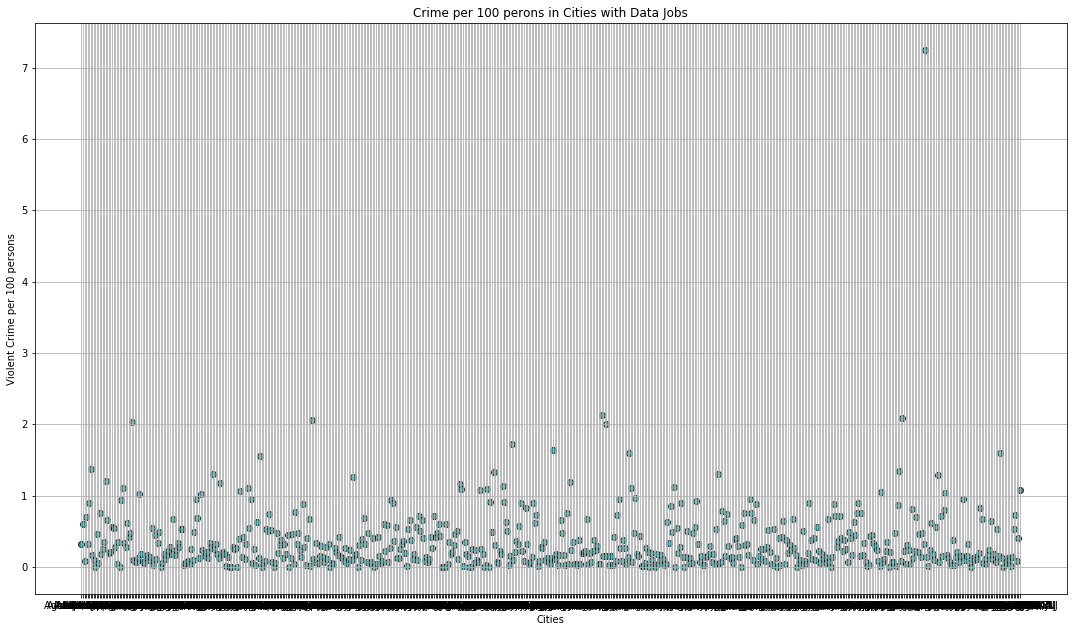

In [23]:
# Chart to display Cities Vs Crime per 100 persons for data jobs

fig, ax = plt.subplots()

ax.scatter(data_jobs_crime_df["Location"], data_jobs_crime_df["Violent Crime /100"], marker='o',
                                color='teal', edgecolor='k', alpha=0.8)

ax.set_xlabel("Cities")
ax.set_ylabel("Violent Crime per 100 persons")
ax.set_title("Crime per 100 perons in Cities with Data Jobs")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

ax.grid()

plt.savefig("charts/Cities Vs Crime per 100 Persons")



<Figure size 432x288 with 0 Axes>